In [9]:
# 📦 ResNet18 食物分類模型 - 預測與中文說明（修正版）

import os
import torch
import torch.nn as nn
from torchvision import transforms, models
from torchvision.models import ResNet18_Weights
from PIL import Image
import pandas as pd
from IPython.display import display

# 設定裝置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 路徑設定
model_path = "resnet18_food.pth"
food_info_path = "C:/Users/echo6/Downloads/Food/food_info.csv"

# 圖片預處理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# 載入食物說明表
food_df = pd.read_csv(food_info_path)
food_dict = dict(zip(food_df['food'], food_df['description']))
class_names = sorted(list(food_dict.keys()))

# 載入模型架構與預訓練權重（修正 deprecated 警告）
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)  # 若不要預訓練，可用 weights=None
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()
print("✅ ResNet18 模型已成功載入")

# 📊 預測函式 + 中文說明輸出
def analyze_image(image_path):
    try:
        image = Image.open(image_path).convert("RGB")
        display(image)
    except Exception as e:
        print(f"❌ 圖片讀取失敗: {e}")
        return

    input_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(input_tensor)
        probs = torch.softmax(output, dim=1)
        top3 = torch.topk(probs, 3)

        print("📊 預測前 3 名：")
        for i in range(3):
            idx = top3.indices[0][i].item()
            prob = top3.values[0][i].item()
            print(f"Top {i+1}: {class_names[idx]}（信心值：{prob:.2%}）")

        top_label = class_names[top3.indices[0][0].item()]
        print(f"\n🍽️ 預測食物（最可能）：{top_label}")
        print(f"📘 食物說明：\n{food_dict.get(top_label, '查無資料')}")

# ✅ 範例使用（請修改為實際圖片路徑）
# analyze_image("C:/Users/echo6/Downloads/Food/data/food-101-tiny/valid/sushi/1012499.jpg")


✅ ResNet18 模型已成功載入


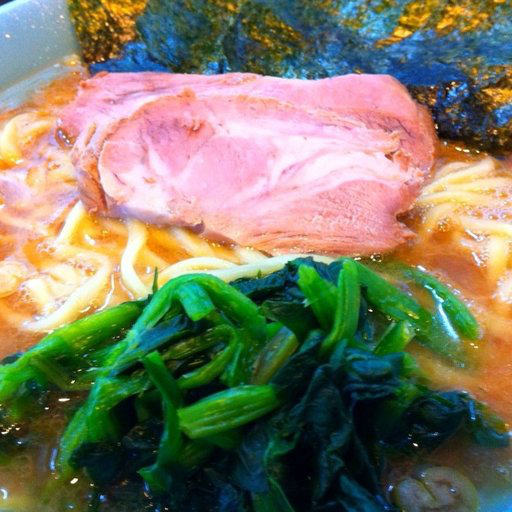

📊 預測前 3 名：
Top 1: ramen（信心值：87.05%）
Top 2: bibimbap（信心值：5.23%）
Top 3: falafel（信心值：3.88%）

🍽️ 預測食物（最可能）：ramen
📘 食物說明：
拉麵為日本代表性麵食，湯頭種類繁多，如豚骨、味噌、醬油，配料常見有叉燒、海苔與蛋。


In [10]:
analyze_image("C:/Users/echo6/Downloads/Food/data/food-101-tiny/valid/ramen/1000325.jpg")


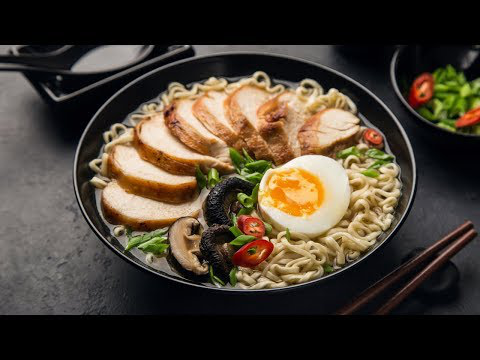

📊 預測前 3 名：
Top 1: ramen（信心值：51.00%）
Top 2: bibimbap（信心值：43.00%）
Top 3: apple_pie（信心值：2.37%）

🍽️ 預測食物（最可能）：ramen
📘 食物說明：
拉麵為日本代表性麵食，湯頭種類繁多，如豚骨、味噌、醬油，配料常見有叉燒、海苔與蛋。


In [6]:
analyze_image("C:/Users/echo6/Downloads/Food/random/test.jpg")


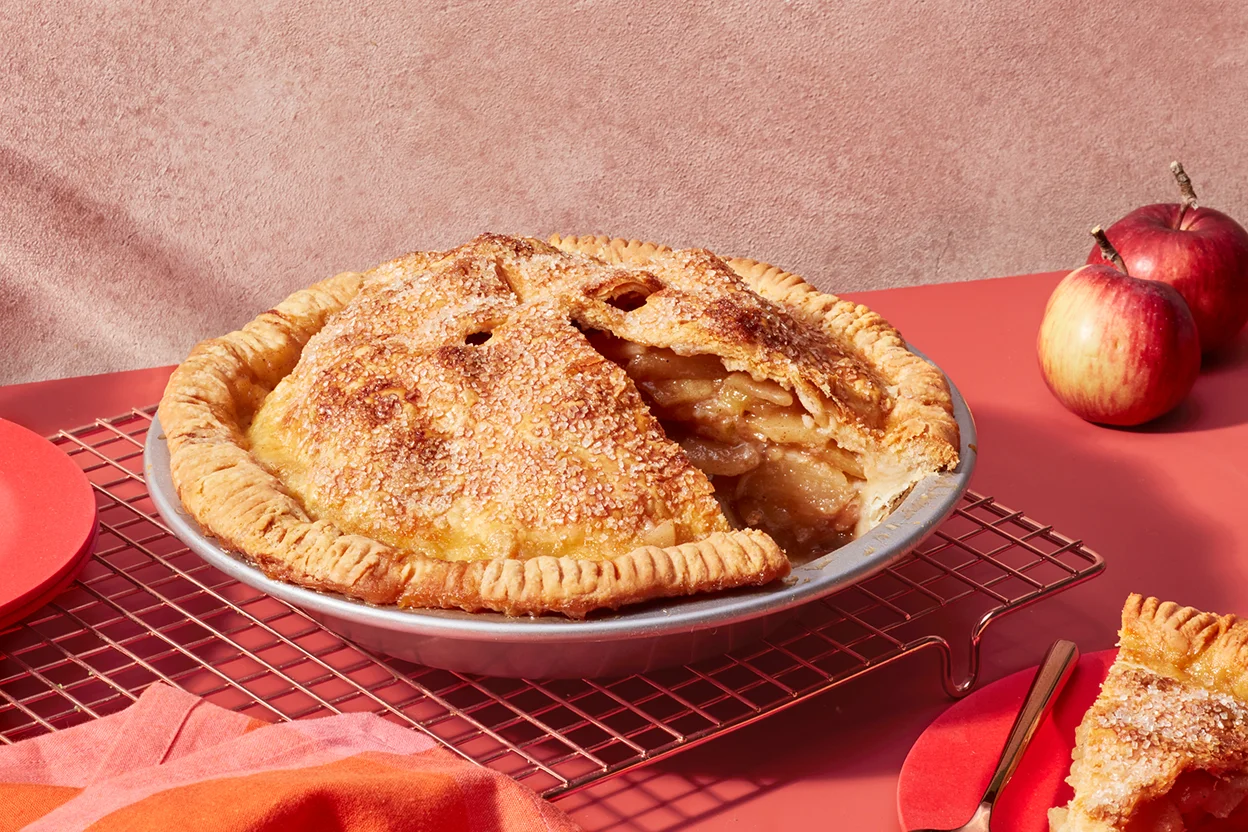

📊 預測前 3 名：
Top 1: apple_pie（信心值：67.38%）
Top 2: french_toast（信心值：20.54%）
Top 3: ice_cream（信心值：2.96%）

🍽️ 預測食物（最可能）：apple_pie
📘 食物說明：
蘋果派是一種甜點，由酥皮包裹蘋果切片與糖、肉桂等內餡烘焙而成，是美式經典甜點。


In [8]:
analyze_image("C:/Users/echo6/Downloads/Food/random/test1.jpg")
